### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA,KernelPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from random import sample
import scipy as sp
import pickle


### Read and see data

In [2]:
data_raw = pd.read_csv('test_ml.txt', sep='\t')
print(data_raw.shape)
data_raw.head()

(608, 33)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x24,x25,x26,x27,x28,x29,x30,x31,x32,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.44,0.01,0.26,0.96,0.0,0.0,0.09,0.55
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.69,0.01,0.26,0.89,0.0,0.0,0.09,0.52
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.43,0.01,0.26,0.88,0.0,0.0,0.09,0.48
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.43,0.01,0.26,0.88,0.0,0.0,0.09,0.48
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.41,0.01,0.26,0.89,0.0,0.0,0.09,0.46


### FEATURE SELECTION

In [3]:
data_raw.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x24,x25,x26,x27,x28,x29,x30,x31,x32,y
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,...,608.0,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,0.044868,0.028668,0.022648,0.023339,0.302632,0.279605,0.050987,0.500000,0.157895,0.032023,...,0.0,0.005724,0.144539,0.360132,0.468273,0.921299,0.106859,0.063076,0.461546,0.504276
std,0.171420,0.138941,0.142750,0.114780,0.459775,0.449175,0.220152,0.500412,0.364943,0.173790,...,0.0,0.064981,0.209985,0.209827,0.191106,0.044497,0.198035,0.130972,0.266834,0.071904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.200000,0.880000,0.000000,0.000000,0.080000,0.340000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.010000,0.220000,0.300000,0.880000,0.000000,0.000000,0.280000,0.450000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,...,0.0,0.000000,0.050000,0.315000,0.440000,0.890000,0.010000,0.020000,0.460000,0.500000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.172500,0.480000,0.590000,0.960000,0.090000,0.040000,0.700000,0.550000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### looks like x24 is constant, let's check if there are other constant features

In [4]:
data_raw.std().sort_values().head()

x24    0.000000
x15    0.043655
x29    0.044497
x25    0.064981
x16    0.067104
dtype: float64

### only x24 is constant. it has no predictive power and we should drop it

In [5]:
data = data_raw.drop(['x24'], axis=1)

In [6]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x23,x25,x26,x27,x28,x29,x30,x31,x32,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.83,0.0,0.44,0.01,0.26,0.96,0.0,0.0,0.09,0.55
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.84,0.0,0.69,0.01,0.26,0.89,0.0,0.0,0.09,0.52
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.86,0.0,0.43,0.01,0.26,0.88,0.0,0.0,0.09,0.48
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.87,0.0,0.43,0.01,0.26,0.88,0.0,0.0,0.09,0.48
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.86,0.0,0.41,0.01,0.26,0.89,0.0,0.0,0.09,0.46


### split data to X and y

In [7]:
X = data.drop(['y'], axis=1)
y = data['y']

### let's observe correlation among features and with y

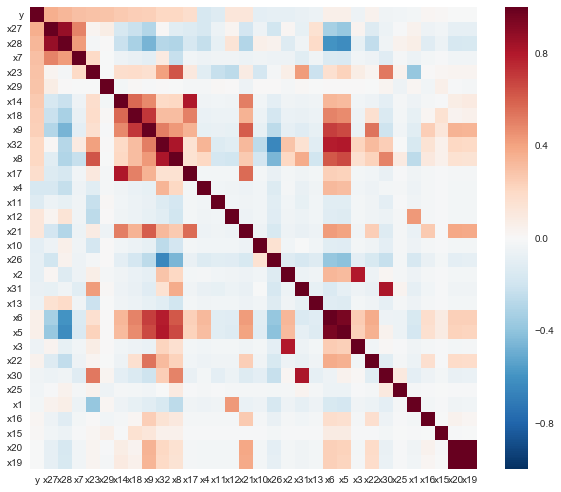

In [8]:
corr_matrix = data.corr()
features_order = np.absolute(corr_matrix).nlargest(33,'y')['y'].index
data = data[np.sort(features_order, axis=-1, kind='quicksort', order=None)]
corr_matrix = data.corr()
cm = np.corrcoef(data[features_order].values.T)
plt.subplots(figsize = (10, 8.5))
sns.heatmap(cm,xticklabels = features_order.values, yticklabels = features_order.values)
plt.show()

### observe data in different way

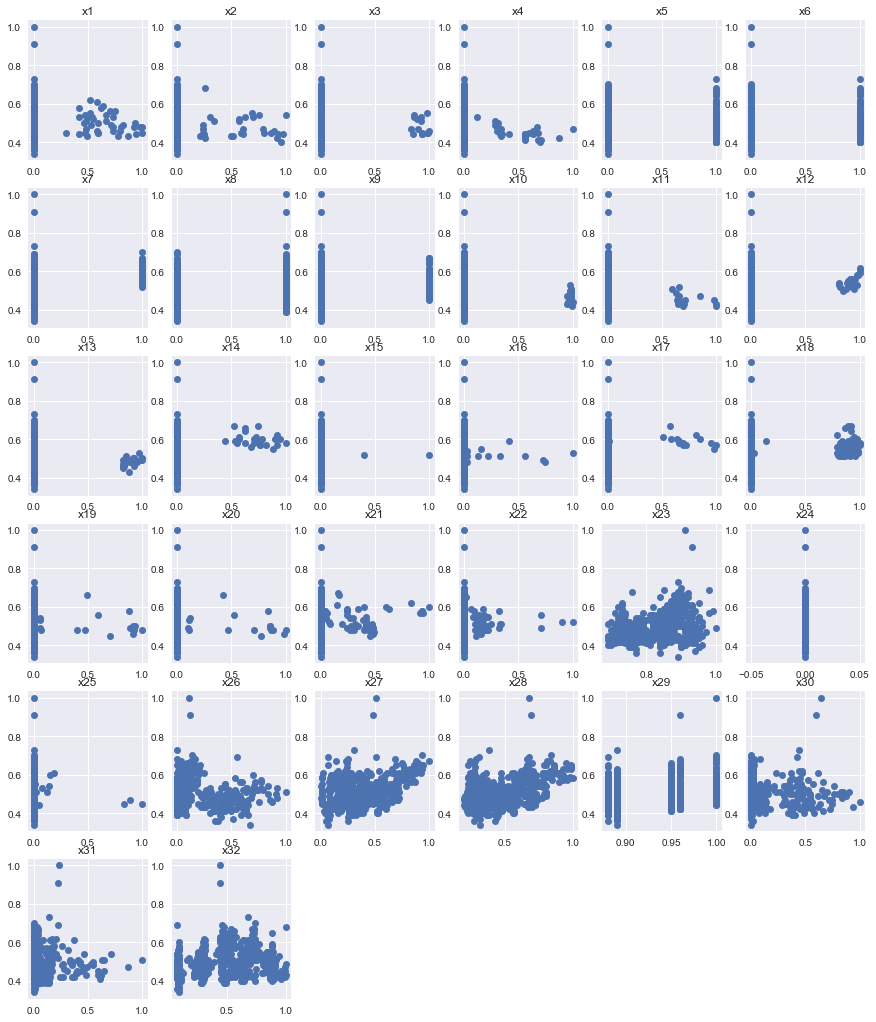

In [9]:
plt.figure(figsize=(15,18))
for i in range(32):
    label = 'x{}'.format(i+1)
    plt.subplot(6,6,i+1)
    x = data_raw[label]
    plt.plot(x, y, 'o')
    plt.title(label)
plt.show()

### We have outliers!

In [10]:
data[y > 0.8]

,x1,x10,x11,x12,x13,x14,x15,x16,x17,x18,...,x30,x31,x32,x4,x5,x6,x7,x8,x9,y
363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.64,0.23,0.44,0.0,0.0,0.0,0.0,1.0,0.0,1.00
364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.60,0.22,0.44,0.0,0.0,0.0,0.0,1.0,0.0,0.91


### Let's delete them

In [11]:
data = data[data['y'] < 0.8]
X = data.drop(['y'], axis=1)
y = data['y']

### next we'll watch distribution of features

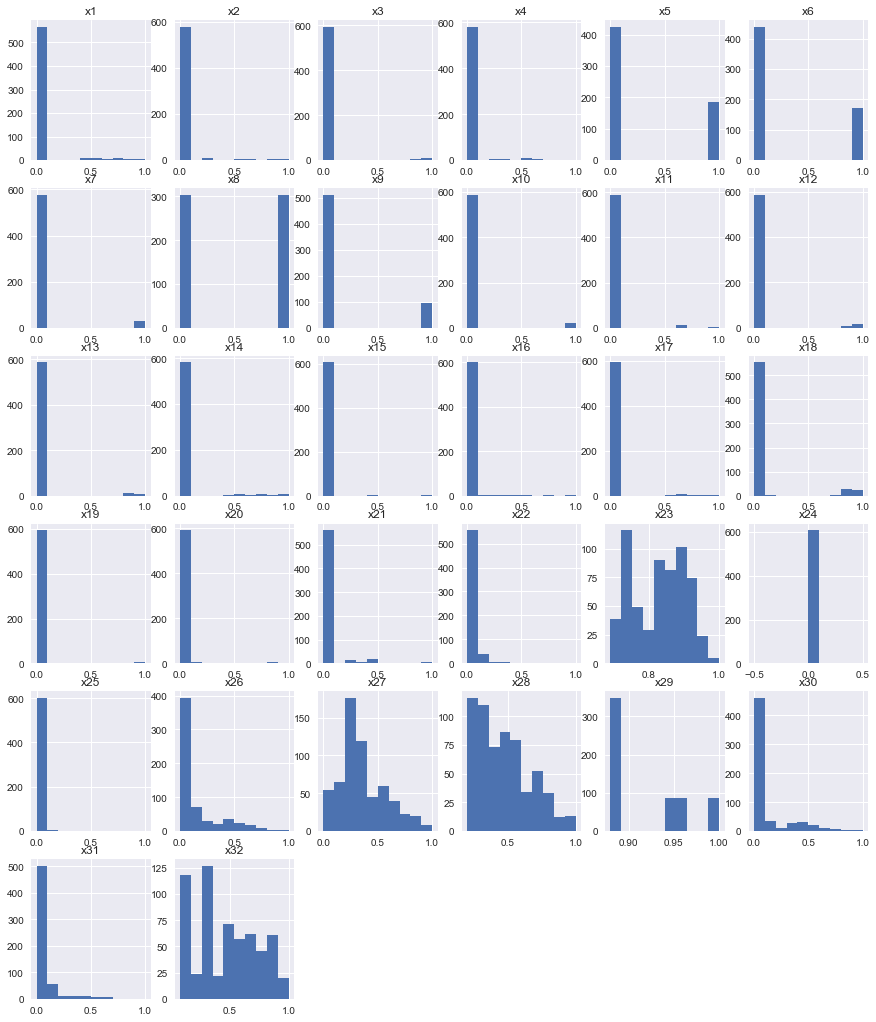

In [12]:
plt.figure(figsize=(15,18))
for i in range(32):
    label = 'x{}'.format(i+1)
    plt.subplot(6,6,i+1)
    x = data_raw[label]
    x.hist(bins=10).set_title(label)
plt.show()

### interesting. all of them are between 0 and 1 therefore normalization is probably not helpful, but we'll check

### and many of them are almost always 0, we should try to drop them sometime
### let's see how many of such features there are and there correlation with y

In [13]:
x_corr_with_y = dict()

x_corr_with_y["feature"] = []
x_corr_with_y["nonzero percentage"] = []
x_corr_with_y["pearson corr with y"] = []
x_corr_with_y["abs value pearson corr with y"] = []

for i in range(31):
    rate_of_nonzero_xi = np.array(data.iloc[:, i] > 0).sum()/608*100
    pearson_coef = np.corrcoef(np.array(data.iloc[:, i]), np.array(data['y']))[0, 1]
    prod = rate_of_nonzero_xi * pearson_coef/100
    
    x_corr_with_y["feature"].append(data.columns.values[i])
    x_corr_with_y["nonzero percentage"].append(int(rate_of_nonzero_xi))
    x_corr_with_y["pearson corr with y"].append(pearson_coef)
    x_corr_with_y["abs value pearson corr with y"].append(abs(pearson_coef))

df_x_corr_with_y = pd.DataFrame(x_corr_with_y)
df_x_corr_with_y.sort_values("abs value pearson corr with y", axis=0, ascending=False).iloc[:, 1:]

,feature,nonzero percentage,pearson corr with y
18,x27,99,0.372780
19,x28,99,0.332497
28,x7,5,0.327571
5,x14,4,0.287867
15,x23,99,0.287203
20,x29,99,0.276559
9,x18,9,0.273472
30,x9,15,0.263594
24,x32,99,0.227048
29,x8,49,0.199161


### at the end we'll select 10 best features according to pearson correlation with y and call it X10

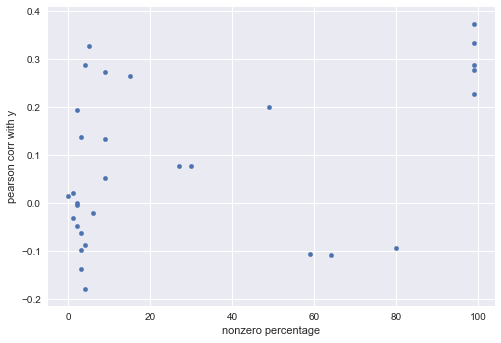

In [14]:
df_x_corr_with_y.plot.scatter("nonzero percentage","pearson corr with y")
plt.show()

### some features which are almost always zero are correlated with y, so we should not delete even them

### PCA

In [15]:
#scaler = MinMaxScaler()
#X_norm = pd.DataFrame(scaler.fit_transform(X))

pca = PCA()
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca)

data_pca = X_pca.copy()
data_pca['y'] = data['y'].copy()
data_pca.columns = data_pca.columns.astype(str)

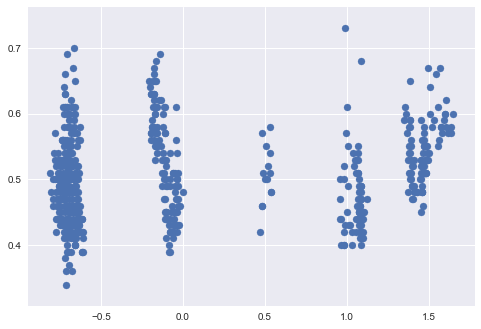

In [16]:
plt.scatter(X_pca.iloc[:, 0], y)

plt.show()

### hmmm... it seems that we have 5 clusters. we'll add dummies for them further

### how many features are important?

In [17]:
x_corr_with_y = dict()

x_corr_with_y["feature"] = []
x_corr_with_y["nonzero percentage"] = []
x_corr_with_y["pearson corr with y"] = []
x_corr_with_y["abs value pearson corr with y"] = []

print("The same feature analysis for data after PCA")

for i in range(31):
    rate_of_nonzero_xi = np.array(data_pca.iloc[:, i] > 0).sum()/608*100
    pearson_coef = np.corrcoef(np.array(data_pca.iloc[:, i]), np.array(y))[0, 1]
    prod = rate_of_nonzero_xi * pearson_coef/100
    
    x_corr_with_y["feature"].append(i)
    x_corr_with_y["nonzero percentage"].append(int(rate_of_nonzero_xi))
    x_corr_with_y["pearson corr with y"].append(pearson_coef)
    x_corr_with_y["abs value pearson corr with y"].append(abs(pearson_coef))

df_x_corr_with_y = pd.DataFrame(x_corr_with_y)
df_x_corr_with_y.sort_values("abs value pearson corr with y", axis=0, ascending=False).iloc[:, 1:]

The same feature analysis for data after PCA


,feature,nonzero percentage,pearson corr with y
2,2,51,0.572995
28,28,54,-0.265674
7,7,50,-0.229381
15,15,51,0.164915
0,0,30,0.151617
16,16,53,0.132668
5,5,52,-0.119187
11,11,43,-0.106687
24,24,52,-0.100187
12,12,47,0.096823


### almost all features have  at least 1% pearson correlation coefficient with y

### Dummies for clusters:

In [18]:
clusters_dummies = pd.DataFrame()
clusters_dummies['1'] = X_pca.iloc[:, 0].apply(lambda x: 1 if x < -0.45 else 0)
clusters_dummies['2'] = X_pca.iloc[:, 0].apply(lambda x: 1 if (x >= -0.45 and x < 0.25) else 0)
clusters_dummies['3'] = X_pca.iloc[:, 0].apply(lambda x: 1 if (x >= 0.25 and x < 0.75) else 0)
clusters_dummies['4'] = X_pca.iloc[:, 0].apply(lambda x: 1 if (x >= 0.75 and x < 1.25) else 0)
clusters_dummies['5'] = X_pca.iloc[:, 0].apply(lambda x: 1 if x >= 1.25 else 0)

### We'll make many types of differently preprocessed data

In [19]:
#X

#X_pca

X10 = X.loc[:,['x27', 'x28', 'x7', 'x14', 'x23', 'x29', 'x18', 'x9', 'x32', 'x8']]

X_pca10 = X_pca.iloc[:,[2,28,7,15,0,16,5,11,24,12]]

scaler = MinMaxScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X))

#X_dum = pd.concat([X, clusters_dummies], axis = 1) ––– somehow it works not properly

X_pca_dum = pd.concat([X_pca, clusters_dummies], axis = 1)

#X10_dum = pd.concat([X10, clusters_dummies], axis = 1)

X_pca10_dum = pd.concat([X_pca10, clusters_dummies], axis = 1)

X_norm_dum = pd.concat([X_norm, clusters_dummies], axis = 1)

data_type_dict = {"just data" : X, 
                  "PCA" : X_pca,
                  "normalized" : X_norm,
                  "just 10": X10,
                  "PCA 10" : X_pca10,
                  #"with dummies" : X_dum, 
                  "PCA with dummies" : X_pca_dum,
                  #"10 with dummies" : X10_dum,
                  "PCA10 dummies" : X_pca10_dum,
                  "normalized dumm" : X_norm_dum
                 }

In [20]:
#print shapes
for name in data_type_dict:
    print(name, data_type_dict[name].shape)

just data (606, 31)
PCA (606, 31)
normalized (606, 31)
just 10 (606, 10)
PCA 10 (606, 10)
PCA with dummies (606, 36)
PCA10 dummies (606, 15)
normalized dumm (606, 36)


### train set selection

In [21]:
batch_size = int(y.shape[0]/10) #it's 10% of all data
test_indexes = sorted(sample(range(y.shape[0]), batch_size))

### Trying models and differently preprocessed data

In [22]:
models = [
            LinearRegression(normalize=True, n_jobs=-1),
            Ridge(),
            Lasso(),
            DecisionTreeRegressor(),
            RandomForestRegressor(),
            SVR(),
            MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', solver='adam',    alpha=0.001,batch_size='auto',
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08),
            KNeighborsRegressor(),
            GradientBoostingRegressor()
            #AdaBoostRegressor
            #XGBClassifier()
        ]

In [23]:
results = dict()
results_model = dict()
results_hope_models = dict()
results_data_type = dict()

In [24]:
for a in range(10):
    validation_indexes = sorted(sample([x for x in range(y.shape[0]) if x not in test_indexes], batch_size))
    train_indexes = sorted([x for x in range(y.shape[0]) if x not in (test_indexes + validation_indexes)])
    
    for data_type in data_type_dict:
        
        #print(data_type)
        X_local = pd.DataFrame(data_type_dict[data_type])
        X_validation = X_local.iloc[validation_indexes]
        X_train = X_local.iloc[train_indexes]
        
        y_validation = y.iloc[validation_indexes]
        y_train = y.iloc[train_indexes]
        
        for model in models:
            model_name = str(model).split("(")[0]
            model_name_and_data_type = model_name + " - " + data_type
            model.fit(X_train, y_train)
            y_validation_pred = model.predict(X_validation)
            r2 = r2_score(y_validation, y_validation_pred)
            
            if model_name_and_data_type in results.keys():
                results[model_name_and_data_type].append(r2)
            else: 
                results[model_name_and_data_type] = [r2]
                
            if model_name in results_model.keys():
                results_model[model_name].append(r2)
            else: 
                results_model[model_name] = [r2]
                
            if data_type in results_data_type.keys():
                results_data_type[data_type].append(r2)
            else: 
                results_data_type[data_type] = [r2]
                
            if model_name in ["GradientBoostingRegressor", "RandomForestRegressor", "KNeighborsRegressor"]:
                if data_type in results_hope_models.keys():
                    results_hope_models[data_type].append(r2)
                else: 
                    results_hope_models[data_type] = [r2]

In [25]:
#Here are all results
#results_df = pd.DataFrame(results)
#results_df.describe().iloc[[1, 2, 3, 7],:].sort_values('mean', axis=1, 
#                                                ascending=False).transpose().round(decimals=3).style.format("{:.3}")

In [26]:
results_model_df = pd.DataFrame(results_model)
results_model_df.describe().iloc[1:,:].sort_values('mean', axis=1, 
                                                ascending=False).transpose().round(decimals=3).style.format("{:.3}")

,mean,std,min,25%,50%,75%,max
GradientBoostingRegressor,0.636,0.096,0.381,0.562,0.649,0.697,0.801
RandomForestRegressor,0.611,0.09,0.427,0.56,0.617,0.67,0.768
KNeighborsRegressor,0.576,0.103,0.363,0.521,0.575,0.652,0.79
LinearRegression,0.539,0.116,0.007,0.47,0.56,0.605,0.691
Ridge,0.516,0.109,0.261,0.447,0.539,0.593,0.706
DecisionTreeRegressor,0.315,0.156,-0.054,0.222,0.334,0.404,0.714
SVR,0.306,0.106,0.025,0.27,0.307,0.363,0.496
Lasso,-0.025,0.022,-0.073,-0.038,-0.02,-0.007,-0.0
MLPRegressor,-0.914,2.07,-8.27,-1.7,0.206,0.415,0.64


### Results depend on a model very strongly. It would be interesting to spend some more time and find out if we can make MLPRegressor and Lasso work properly

In [27]:
results_data_type_df = pd.DataFrame(results_data_type)
results_data_type_df.describe().iloc[1:,:].sort_values('mean', axis=1, 
                                                ascending=False).transpose().round(decimals=3).style.format("{:.3}")

,mean,std,min,25%,50%,75%,max
PCA 10,0.347,0.564,-4.44,0.268,0.473,0.568,0.767
normalized,0.342,0.709,-5.63,0.312,0.488,0.623,0.766
PCA with dummies,0.34,0.684,-5.34,0.283,0.488,0.606,0.797
PCA,0.32,0.666,-3.99,0.286,0.5,0.595,0.801
just 10,0.311,0.582,-3.41,0.261,0.416,0.602,0.79
PCA10 dummies,0.243,1.02,-6.12,0.284,0.475,0.569,0.784
normalized dumm,0.186,1.07,-6.58,0.232,0.457,0.622,0.77
just data,0.186,1.17,-8.27,0.242,0.483,0.617,0.768


### 25%, 75% percentiles and the median show that on average all types of data work pretty much the same. But result is more stable with PCA10 with dummies. Let's gather this statistics only for well working models:

In [28]:
results_hope_models_df = pd.DataFrame(results_hope_models)
results_hope_models_df.describe().iloc[1:,:].sort_values('mean', axis=1, 
                                                ascending=False).transpose().round(decimals=3).style.format("{:.3}")

,mean,std,min,25%,50%,75%,max
just 10,0.636,0.091,0.422,0.571,0.64,0.696,0.79
PCA with dummies,0.625,0.09,0.376,0.574,0.635,0.682,0.797
just data,0.613,0.102,0.364,0.553,0.644,0.68,0.768
PCA,0.611,0.095,0.376,0.562,0.601,0.681,0.801
normalized dumm,0.602,0.118,0.363,0.516,0.629,0.681,0.77
normalized,0.597,0.118,0.363,0.522,0.631,0.676,0.766
PCA 10,0.591,0.088,0.415,0.544,0.574,0.651,0.767
PCA10 dummies,0.586,0.085,0.415,0.541,0.576,0.641,0.784


### as we see, all types of data are pretty much the same helpful when we use good models

### 20 best

In [29]:
results_df = pd.DataFrame(results)
results_df.describe().iloc[[1, 2, 3, 7],:].sort_values('mean', axis=1, 
                                                ascending=False).transpose().iloc[:20, :].round(decimals=3).style.format("{:.3}")

,mean,std,min,max
GradientBoostingRegressor - PCA with dummies,0.664,0.084,0.562,0.797
GradientBoostingRegressor - PCA,0.663,0.083,0.562,0.801
RandomForestRegressor - just 10,0.645,0.074,0.507,0.753
GradientBoostingRegressor - just 10,0.636,0.103,0.422,0.785
GradientBoostingRegressor - normalized dumm,0.635,0.112,0.402,0.77
GradientBoostingRegressor - normalized,0.629,0.115,0.388,0.766
KNeighborsRegressor - just 10,0.628,0.102,0.461,0.79
RandomForestRegressor - normalized dumm,0.626,0.097,0.469,0.768
GradientBoostingRegressor - just data,0.626,0.113,0.381,0.763
RandomForestRegressor - just data,0.624,0.094,0.476,0.768


### Random Forest, Gradient Boosting and KNN are the most predictive models

### GRIDSEARCH

In [30]:
results_for_chosen = dict()

### Gridsearch for KNN Hyperparametrs

In [31]:
for i in range(20):
    validation_indexes = sorted(sample([x for x in range(y.shape[0]) if x not in test_indexes], batch_size))
    train_indexes = sorted([x for x in range(y.shape[0]) if x not in (test_indexes + validation_indexes)])

    X_validation = X10.iloc[validation_indexes]
    X_train = X10.iloc[train_indexes]

    y_validation = y.iloc[validation_indexes]
    y_train = y.iloc[train_indexes]

    model = KNeighborsRegressor(n_jobs=-1)
    params = {'n_neighbors':[5,6,7,8,9,10],
              'leaf_size':[1,2,3,5],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'n_jobs':[-1]}
    model1 = GridSearchCV(model, param_grid=params, n_jobs=1, refit=True)
    model.fit(X_train, y_train)
    y_validation_pred = model.predict(X_validation)
    r2 = r2_score(y_validation, y_validation_pred)
    
    model_name = str(model).split("(")[0]
    model_name_and_data_type = model_name + " - " + data_type
    if model_name_and_data_type in results_for_chosen.keys():
        results_for_chosen[model_name_and_data_type].append(r2)
    else: 
        results_for_chosen[model_name_and_data_type] = [r2]
        
    print("r2 =", r2)

r2 = 0.733331489306
r2 = 0.633692136892
r2 = 0.716206609388
r2 = 0.722135619223
r2 = 0.55898322483
r2 = 0.631576010046
r2 = 0.295103031739
r2 = 0.726242829828
r2 = 0.707398162939
r2 = 0.57174014644
r2 = 0.710590822405
r2 = 0.703925266181
r2 = 0.479337978365
r2 = 0.691693413174
r2 = 0.646436005074
r2 = 0.683282219042
r2 = 0.76099365246
r2 = 0.713167833456
r2 = 0.647619780051
r2 = 0.452405282946


### Gridsearch for Random Forest

In [32]:
for i in range(20):
    validation_indexes = sorted(sample([x for x in range(y.shape[0]) if x not in test_indexes], batch_size))
    train_indexes = sorted([x for x in range(y.shape[0]) if x not in (test_indexes + validation_indexes)])

    X_validation = X.iloc[validation_indexes]
    X_train = X.iloc[train_indexes]

    y_validation = y.iloc[validation_indexes]
    y_train = y.iloc[train_indexes]

    model = RandomForestRegressor()
    params = {'criterion':['gini','entropy'],
              'n_estimators':[10,15,20,25,30],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[3,4,5,6,7], 
              'random_state':[123],
              'n_jobs':[-1]}
    model1 = GridSearchCV(model, param_grid=params, n_jobs=1, refit=True)
    model.fit(X_train, y_train)
    y_validation_pred = model.predict(X_validation)
    r2 = r2_score(y_validation, y_validation_pred)
    
    model_name = str(model).split("(")[0]
    model_name_and_data_type = model_name + " - " + data_type
    if model_name_and_data_type in results_for_chosen.keys():
        results_for_chosen[model_name_and_data_type].append(r2)
    else: 
        results_for_chosen[model_name_and_data_type] = [r2]
        
    print("r2 =", r2)

r2 = 0.708644980576
r2 = 0.590524436846
r2 = 0.679305677742
r2 = 0.589211974317
r2 = 0.65319713684
r2 = 0.694281116813
r2 = 0.767895735379
r2 = 0.702395173712
r2 = 0.737655454594
r2 = 0.711013038251
r2 = 0.674944335136
r2 = 0.733641622404
r2 = 0.491090686729
r2 = 0.680059701093
r2 = 0.679859708637
r2 = 0.676645073304
r2 = 0.604376440842
r2 = 0.783994273644
r2 = 0.752178268516
r2 = 0.68727797052


### Gridsearch for Gradient Boosting

In [33]:
for i in range(20):
    validation_indexes = sorted(sample([x for x in range(y.shape[0]) if x not in test_indexes], batch_size))
    train_indexes = sorted([x for x in range(y.shape[0]) if x not in (test_indexes + validation_indexes)])

    X_validation = X_pca.iloc[validation_indexes]
    X_train = X_pca.iloc[train_indexes]

    y_validation = y.iloc[validation_indexes]
    y_train = y.iloc[train_indexes]

    model = GradientBoostingRegressor()
    params = {'criterion':['gini','entropy'],
              'n_estimators':[10,15,20,25,30],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[3,4,5,6,7], 
              'random_state':[123],
              'n_jobs':[-1]}
    model1 = GridSearchCV(model, param_grid=params, n_jobs=1, refit=True)
    model.fit(X_train, y_train)
    y_validation_pred = model.predict(X_validation)
    r2 = r2_score(y_validation, y_validation_pred)
    
    model_name = str(model).split("(")[0]
    model_name_and_data_type = model_name + " - " + data_type
    if model_name_and_data_type in results_for_chosen.keys():
        results_for_chosen[model_name_and_data_type].append(r2)
    else: 
        results_for_chosen[model_name_and_data_type] = [r2]
        
    print("r2 =", r2)

r2 = 0.628947272419
r2 = 0.747042230721
r2 = 0.721037851115
r2 = 0.637910213628
r2 = 0.70951590889
r2 = 0.536958181238
r2 = 0.523392367861
r2 = 0.471491332464
r2 = 0.607341518343
r2 = 0.651082320434
r2 = 0.732791607784
r2 = 0.786277770185
r2 = 0.697716960264
r2 = 0.639861917777
r2 = 0.766685158009
r2 = 0.615795484311
r2 = 0.515169173169
r2 = 0.635206250126
r2 = 0.745621865096
r2 = 0.75461308984


In [34]:
pd.DataFrame(results_for_chosen).describe().iloc[[1, 2, 3, 7],:].sort_values('mean', axis=1, 
                                                ascending=False).transpose().iloc[:20, :].round(decimals=3).style.format("{:.3}")

,mean,std,min,max
RandomForestRegressor - normalized dumm,0.68,0.069,0.491,0.784
GradientBoostingRegressor - normalized dumm,0.656,0.092,0.471,0.786
KNeighborsRegressor - normalized dumm,0.639,0.117,0.295,0.761
